<a href="https://colab.research.google.com/github/Sheebahlangat/Data-scince-and-AI-projects/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
#Step 2: Load the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


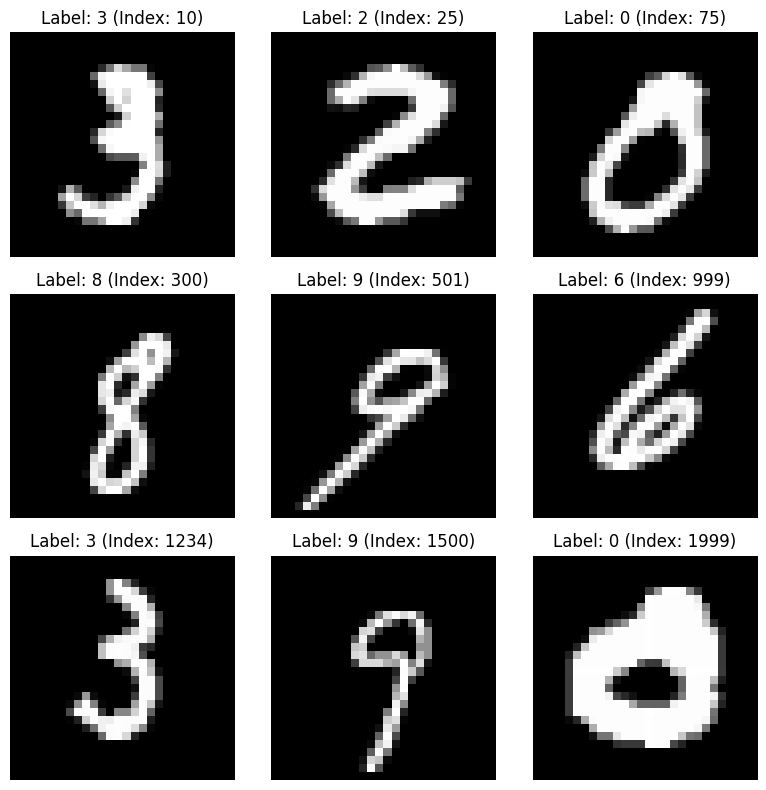

In [5]:
# Step 3: Preprocess the Data
X_train = X_train / 255.0  # Normalize pixel values to [0,1]
X_test = X_test / 255.0
y_train_cat = to_categorical(y_train, 10)  # One-hot encode labels
y_test_cat = to_categorical(y_test, 10)

# Plot some digits from dataset
selected_indices = [10, 25, 75, 300, 501, 999, 1234, 1500, 1999]  # Choose which image indices to display

plt.figure(figsize=(8, 8))

for i, idx in enumerate(selected_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]} (Index: {idx})")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Step 4: Build the ANN Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# Step 6: Train the Model
history = model.fit(X_train, y_train_cat,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3782 - loss: 1.9197 - val_accuracy: 0.7840 - val_loss: 0.7530
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7120 - loss: 0.8557 - val_accuracy: 0.8733 - val_loss: 0.4857
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8055 - loss: 0.6356 - val_accuracy: 0.8992 - val_loss: 0.3668
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8427 - loss: 0.5199 - val_accuracy: 0.9145 - val_loss: 0.3131
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8672 - loss: 0.4532 - val_accuracy: 0.9228 - val_loss: 0.2729
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8783 - loss: 0.4103 - val_accuracy: 0.9283 - val_loss: 0.2446
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8927 - loss: 0.3712 - val_accuracy: 0.9350 - val_loss: 0.2219
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8990 - loss: 0.3458 - val_accuracy: 0

In [9]:
# Step 7: Evaluate on Test Set
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9241 - loss: 0.2426
Test Accuracy: 0.9346


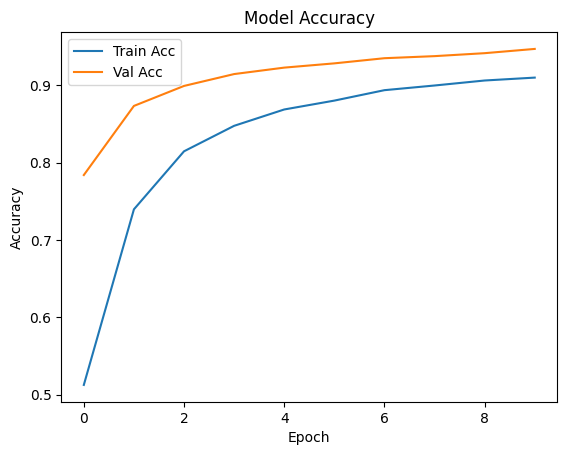

In [10]:
# Step 8: Visualize Training History
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


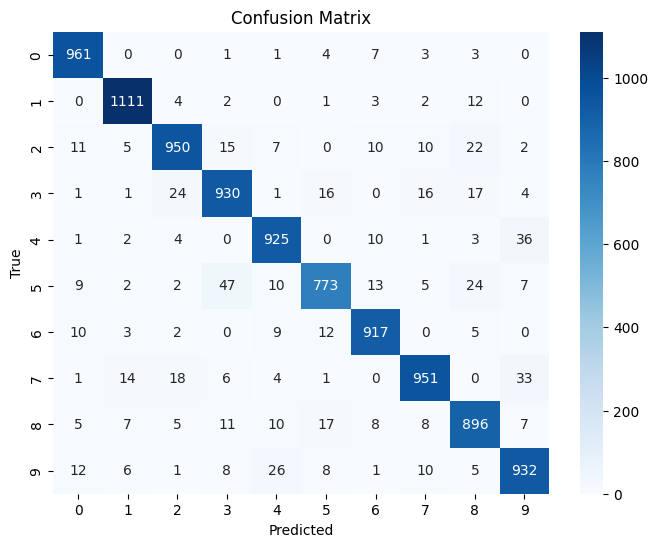

In [11]:
# Step 9: Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Step 10: Classification Report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.92      0.93      1032
           3       0.91      0.92      0.92      1010
           4       0.93      0.94      0.94       982
           5       0.93      0.87      0.90       892
           6       0.95      0.96      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.91      0.92      0.91       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [13]:
# Step 11: Save and Reload the Model
model.save("mnist_ann_model.h5")

from tensorflow.keras.models import load_model
reloaded_model = load_model("mnist_ann_model.h5")
reloaded_model.evaluate(X_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9241 - loss: 0.2426


[0.21533536911010742, 0.9345999956130981]